In [27]:
# Import the Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key
from scipy.stats import linregress


In [9]:
lats=np.random.uniform(low=-90,high=90,size=1500)
lngs=np.random.uniform(low=-180,high=180,size=1500)
lats_lngs=zip(lats,lngs)
lats_lngs

In [10]:
coordinates=list(lats_lngs)
coordinates

[(-36.27638538763738, 26.231260289747468),
 (12.41859143874801, 40.80499389133763),
 (56.14837257197084, -72.5881899999114),
 (-85.27999321745341, -121.6379262777196),
 (38.8992926688515, 163.1264907446701),
 (-11.452994940676078, 178.5952502105256),
 (57.289890919298955, 157.04256539192858),
 (-81.81776024096867, 96.07383935643622),
 (13.48970369722555, 15.153046202965896),
 (2.452228179172735, -69.07080733032245),
 (29.376196213597595, -152.0878999296159),
 (-25.446163986736792, -30.15778519014387),
 (3.874230440059989, -12.578973493914674),
 (-70.79795779071756, -10.306939244193302),
 (14.519375712944424, -118.11068511247437),
 (11.465337979747858, 93.90619023663965),
 (56.07769743089389, 31.78070144352452),
 (-42.99264621592449, -156.12642118562013),
 (-71.51940424246827, -85.0336118908842),
 (-88.83906282203647, 139.1283171844393),
 (3.4377195912099268, 177.04650007653305),
 (8.08947950913263, 103.77758505046688),
 (-32.12713840939972, -56.499239717330894),
 (34.77058613872606, -3

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)    

625

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | dubti
Processing Record 3 of Set 1 | chapais
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | asau
Processing Record 7 of Set 1 | tigil
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | mao
Processing Record 10 of Set 1 | mitu
Processing Record 11 of Set 1 | kahului
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | monrovia
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | port blair
Processing Record 17 of Set 1 | staraya toropa
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 21 of Set 1 | ca mau
Processing Record 22 of Set 1 | tacuarembo
Processing 

Processing Record 37 of Set 4 | clyde river
Processing Record 38 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 39 of Set 4 | tasiilaq
Processing Record 40 of Set 4 | nuuk
Processing Record 41 of Set 4 | flin flon
Processing Record 42 of Set 4 | talcahuano
Processing Record 43 of Set 4 | kulhudhuffushi
Processing Record 44 of Set 4 | mahebourg
Processing Record 45 of Set 4 | opuwo
Processing Record 46 of Set 4 | ambon
Processing Record 47 of Set 4 | muros
Processing Record 48 of Set 4 | makasar
Processing Record 49 of Set 4 | samarai
Processing Record 50 of Set 4 | cayenne
Processing Record 1 of Set 5 | hami
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | kavaratti
Processing Record 4 of Set 5 | annau
Processing Record 5 of Set 5 | high rock
Processing Record 6 of Set 5 | kapaa
Processing Record 7 of Set 5 | vanavara
Processing Record 8 of Set 5 | vylkove
Processing Record 9 of Set 5 | denpasar
Processing Record 10 of Set 5 | popondett

Processing Record 25 of Set 8 | deputatskiy
Processing Record 26 of Set 8 | bouna
Processing Record 27 of Set 8 | pemba
Processing Record 28 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 29 of Set 8 | santiago
Processing Record 30 of Set 8 | hamilton
Processing Record 31 of Set 8 | duz
City not found. Skipping...
Processing Record 32 of Set 8 | ahipara
Processing Record 33 of Set 8 | beaupre
Processing Record 34 of Set 8 | yulara
Processing Record 35 of Set 8 | dhangadhi
Processing Record 36 of Set 8 | bandarbeyla
Processing Record 37 of Set 8 | tautira
Processing Record 38 of Set 8 | chifeng
Processing Record 39 of Set 8 | yomitan
City not found. Skipping...
Processing Record 40 of Set 8 | prieska
Processing Record 41 of Set 8 | massaguet
Processing Record 42 of Set 8 | ishim
Processing Record 43 of Set 8 | port hardy
Processing Record 44 of Set 8 | inuvik
Processing Record 45 of Set 8 | shingu
Processing Record 46 of Set 8 | panaba
Processing Record 47 of Set 8 

City not found. Skipping...
Processing Record 16 of Set 12 | fortuna
Processing Record 17 of Set 12 | kruisfontein
Processing Record 18 of Set 12 | tado
Processing Record 19 of Set 12 | mogzon
Processing Record 20 of Set 12 | half moon bay
Processing Record 21 of Set 12 | paamiut
Processing Record 22 of Set 12 | tezu
Processing Record 23 of Set 12 | mount isa
Processing Record 24 of Set 12 | moose factory
Processing Record 25 of Set 12 | sun valley
Processing Record 26 of Set 12 | maumere
Processing Record 27 of Set 12 | porto belo
Processing Record 28 of Set 12 | san policarpo
Processing Record 29 of Set 12 | burkhala
City not found. Skipping...
Processing Record 30 of Set 12 | marsa matruh
Processing Record 31 of Set 12 | angra
City not found. Skipping...
Processing Record 32 of Set 12 | gizo
Processing Record 33 of Set 12 | uribia
Processing Record 34 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 35 of Set 12 | torit
Processing Record 36 of Set 12 | nurlat


In [76]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,58.32,82,88,1.01,ZA,2022-04-15 21:17:56
1,Dubti,11.7361,41.0853,90.01,35,85,10.00,ET,2022-04-15 21:19:23
2,Chapais,49.7834,-74.8492,37.18,65,100,9.44,CA,2022-04-15 21:19:23
3,Punta Arenas,-53.1500,-70.9167,50.11,66,20,26.46,CL,2022-04-15 21:19:11
4,Severo-Kurilsk,50.6789,156.1250,30.81,79,62,3.27,RU,2022-04-15 21:19:24


In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

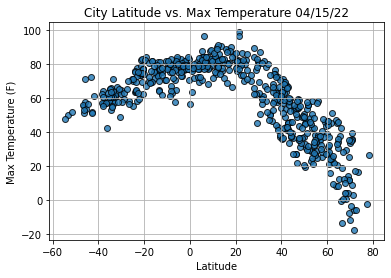

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

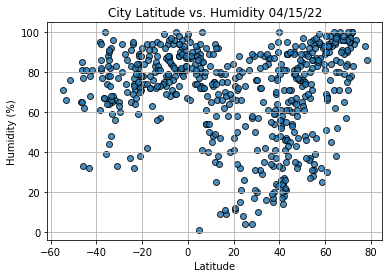

In [23]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Humvslat.png")

# Show plot.
plt.show()

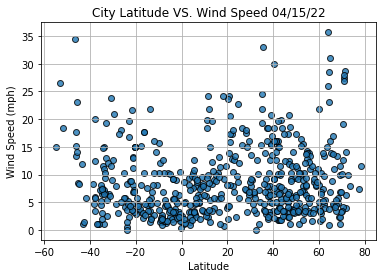

In [25]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude VS. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/windvslat.png")

# Show plot.
plt.show()

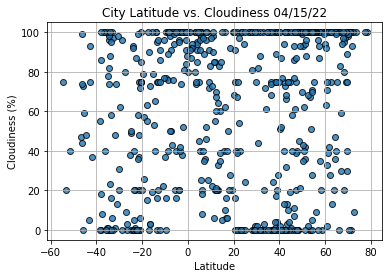

In [26]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/CLoudyvslat.png")

# Show plot.
plt.show()

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


    

In [47]:
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]

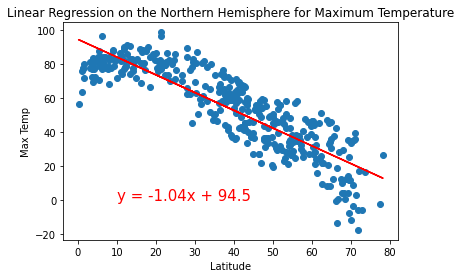

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,0))

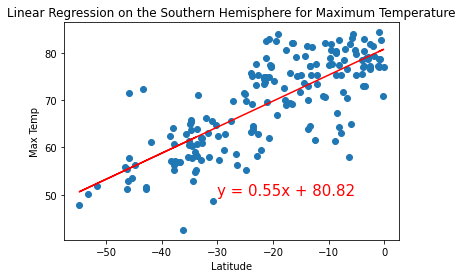

In [57]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-30,50))

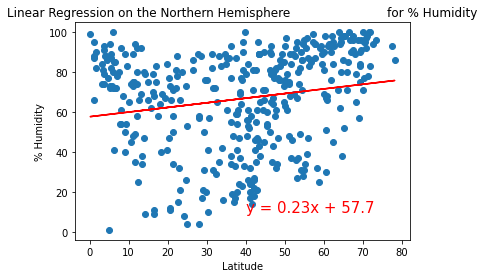

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

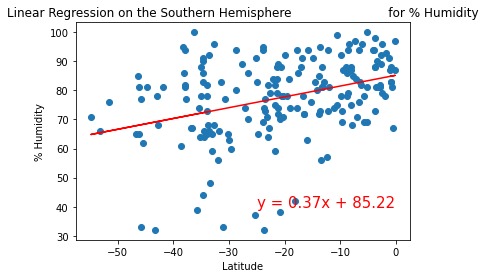

In [63]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,40))

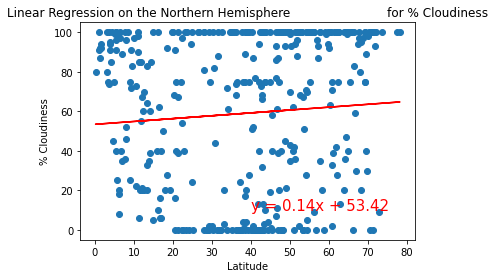

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

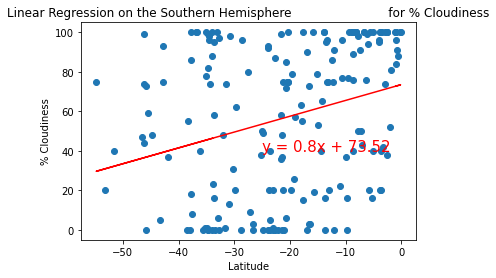

In [65]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-25,40))

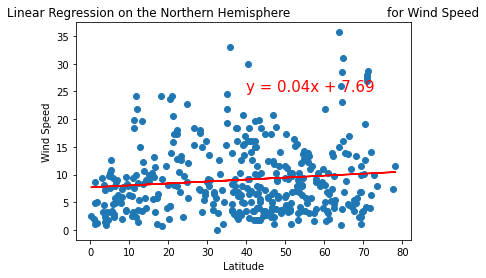

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

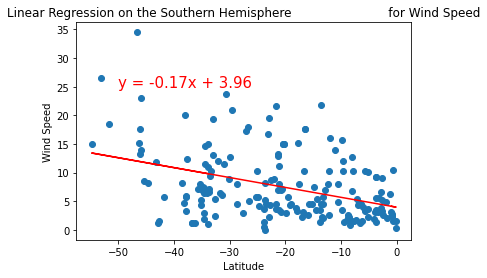

In [71]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [ ]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]